## Лабораторная работа 1. Морфологический парсер mystem

**Задание 1.** Изучите документацию и лицензию (!) морфологического парсера mystem от Yandex: https://yandex.ru/dev/mystem.

**Задание 2.** Установите `pymystem3` – интерфейс к mystem на Python: https://pypi.org/project/pymystem3.

(!) Обратите внимание, что у конструктора объекта Mystem() есть параметры.

**Задание 3.** Выпишите с какими параметрами запускается морфологический анализатор.

*Ваш ответ:*

*Основные параметры:*

mystem_bin (строка) - Задает путь к исполняемому файлу mystem. По умолчанию: None (автоматический поиск в системе)

grammar_info (булево) - Определяет, включать ли (True) грамматическую информацию в результат. По умолчанию: True

disambiguation (булево) - Определяет, выполнять ли (True) снятие омонимии (разрешение многозначности). По умолчанию: True

entire_input (булево) - Определяет, обрабатывать ли весь входной текст как единое целое (False) или по предложениям (True). По умолчанию: False

weight (булево) - определяет, включать ли (True) веса (вероятность) для различных вариантов разбора. По умолчанию: False


**а)** Придумайте и запишите примеры предложений со словами не из словаря. Приведите их полученные морфологические разборы.

*Ваш ответ:*

In [1]:
import json
from pymystem3 import Mystem

text = "В мурелки шлепают пельсиски. В стакелках светится мычай."
m = Mystem()
lemmas = m.lemmatize(text)
result = m.analyze(text)
# Вывод с JSON (ensure_ascii=False - для корректного отображения криллицы, indent=2 - для отображения с отступами)
print("lemmas:", ''.join(lemmas))
print("full info:", json.dumps(result, ensure_ascii=False, indent=2))

# Простой вывод без JSON
for analysis in result:
    if 'analysis' in analysis and analysis['analysis']:
        first_analysis = analysis['analysis'][0]
        print(f"Слово: {analysis['text']}")
        print(f"Лемма: {first_analysis.get('lex', 'N/A')}")
        print(f"Вероятность: {first_analysis.get('wt', 'N/A')}")
        print(f"Качество разбора: {first_analysis.get('qual', 'N/A')}")
        print(f"Часть речи: {first_analysis.get('gr', 'N/A')}")
        print("---")

lemmas: в мурелки шлепать пельсиска. в стакелки светиться мычай.

full info: [
  {
    "analysis": [
      {
        "lex": "в",
        "wt": 0.9999917878,
        "gr": "PR="
      }
    ],
    "text": "В"
  },
  {
    "text": " "
  },
  {
    "analysis": [
      {
        "lex": "мурелки",
        "wt": 0.3071978724,
        "qual": "bastard",
        "gr": "S,мн,неод=(вин|им)"
      }
    ],
    "text": "мурелки"
  },
  {
    "text": " "
  },
  {
    "analysis": [
      {
        "lex": "шлепать",
        "wt": 1,
        "gr": "V,несов,пе=непрош,мн,изъяв,3-л"
      }
    ],
    "text": "шлепают"
  },
  {
    "text": " "
  },
  {
    "analysis": [
      {
        "lex": "пельсиска",
        "wt": 0.8765642748,
        "qual": "bastard",
        "gr": "S,жен,неод=(вин,мн|род,ед|им,мн)"
      }
    ],
    "text": "пельсиски"
  },
  {
    "text": ". "
  },
  {
    "analysis": [
      {
        "lex": "в",
        "wt": 0.9999917878,
        "gr": "PR="
      }
    ],
    "text": "В"
 

**б)** Применяется ли контекстное снятие омонимии при морфологическом разборе?

*Ваш ответ:*
Да, если соответствующий параметр не отменен

In [2]:
text = "Косой косил косой косой."
m = Mystem() # Cо снятием омонимии
lemmas = m.lemmatize(text)
result = m.analyze(text)

# Простой вывод без JSON
print('====== Со снятием омонимии =====')
for analysis in result:
    if 'analysis' in analysis and analysis['analysis']:
        first_analysis = analysis['analysis'][0]
        print(f"Слово: {analysis['text']}")
        print(f"Лемма: {first_analysis.get('lex', 'N/A')}")
        print(f"Вероятность: {first_analysis.get('wt', 'N/A')}")
        print(f"Качество разбора: {first_analysis.get('qual', 'N/A')}")
        print(f"Часть речи: {first_analysis.get('gr', 'N/A')}")
        print("---")

m = Mystem(disambiguation = False) # Без снятия омонимии
lemmas = m.lemmatize(text)
result = m.analyze(text)
# Простой вывод без JSON
print('====== Без снятия омонимии =====')
for analysis in result:
    if 'analysis' in analysis and analysis['analysis']:
        first_analysis = analysis['analysis'][0]
        print(f"Слово: {analysis['text']}")
        print(f"Лемма: {first_analysis.get('lex', 'N/A')}")
        print(f"Вероятность: {first_analysis.get('wt', 'N/A')}")
        print(f"Качество разбора: {first_analysis.get('qual', 'N/A')}")
        print(f"Часть речи: {first_analysis.get('gr', 'N/A')}")
        print("---")

====== Со снятием омонимии =====
Слово: Косой
Лемма: косой
Вероятность: 0.02977325584
Качество разбора: N/A
Часть речи: S,муж,од=им,ед
---
Слово: косил
Лемма: косить
Вероятность: 1
Качество разбора: N/A
Часть речи: V,несов,пе=прош,ед,изъяв,муж
---
Слово: косой
Лемма: косой
Вероятность: 0.6712371009
Качество разбора: N/A
Часть речи: A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)
---
Слово: косой
Лемма: коса
Вероятность: 0.2834719822
Качество разбора: N/A
Часть речи: S,жен,неод=твор,ед
---
====== Без снятия омонимии =====
Слово: Косой
Лемма: косой
Вероятность: 0.6712371009
Качество разбора: N/A
Часть речи: A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)
---
Слово: косил
Лемма: косить
Вероятность: 1
Качество разбора: N/A
Часть речи: V,несов,пе=прош,ед,изъяв,муж
---
Слово: косой
Лемма: косой
Вероятность: 0.6712371009
Качество разбора: N/A
Часть речи: A=(вин,ед,полн,муж,неод|им,е

**Задание 4.** Напишите функцию `parse_text()`, на вход которой поступает текст (в виде строки), а на выходе формируется структура данных, содержащая для каждого слова входного текста следующую информацию:
- исходную словоформу (wordform);
- нормальную форму слова (лемму) (norm, lemma);
- часть речи (part of speech, POS);
- другую грамматическую информацию, выдаваемую mystem;
- признак, присутствует ли слово в словаре mystem.

Функция должна выбирать наиболее вероятный вариант морфологического разбора слова.

In [3]:
# Ваш код
def parse_text(text):
    m = Mystem()
    analysis_result = m.analyze(text)

    parsed_words = []

    for item in analysis_result:
        # Пропускаем пробелы и знаки препинания
        if not item.get('analysis') or not item['text'].strip():
            continue

        wordform = item['text']

        # Выбираем наиболее вероятный вариант разбора (с максимальным весом)
        best_analysis = max(item['analysis'], key=lambda x: x.get('wt', 0))

        # Извлекаем лемму
        lemma = best_analysis.get('lex', wordform)

        # Извлекаем часть речи и грамматическую информацию
        gr = best_analysis.get('gr', '')

        # Парсим грамматическую информацию
        parts = gr.split(',', maxsplit = 1)  # maxsplit=1 - разделить только один раз
        # Получаем часть речи и остальную грамматику
        pos = parts[0]
        grammar_info = parts[1] if len(parts) > 1 else ""

        # Определяем, есть ли слово в словаре
        in_dictionary = best_analysis.get('qual') != 'bastard'

        word_info = {
            'wordform': wordform,
            'lemma': lemma,
            'part_of_speech': pos,
            'grammar_info': grammar_info,
            'in_dictionary': in_dictionary,
            'weight': best_analysis.get('wt', 1),
            'full_gr_string': gr,
            'qual': best_analysis.get('qual', 'unknown')
        }

        parsed_words.append(word_info)

    return parsed_words

In [4]:
def print_info(w):

    print(f'wordform: {w['wordform']}')
    print(f'lemma: {w['lemma']}')
    print(f'part_of_speech: {w['part_of_speech']}')
    print(f'grammar_info: {w['grammar_info']}')
    print(f'in_dictionary: {w['in_dictionary']}')
    print(f'weight: {w['weight']}')
    #print(f'full_gr_string: {w['full_gr_string']}')
    print(f'qual: {w['qual']}')
    print('\n','='*50,'\n')

In [5]:
text = 'Процедура разбора текста'
result_parsed_words = parse_text(text)
for item in result_parsed_words:
    print_info(item)

wordform: Процедура
lemma: процедура
part_of_speech: S
grammar_info: жен,неод=им,ед
in_dictionary: True
weight: 1
qual: unknown


wordform: разбора
lemma: разбор
part_of_speech: S
grammar_info: муж,неод=род,ед
in_dictionary: True
weight: 1
qual: unknown


wordform: текста
lemma: текст
part_of_speech: S
grammar_info: муж,неод=род,ед
in_dictionary: True
weight: 1
qual: unknown




**Задание 5.** Напишите функцию `save_morph_results()`, сохраняющую структуру данных, получаемую функцией `parse_text()`, в текстовый файл формата JSON.


In [6]:
# Ваш код
# Запись в файл
def save_morph_results(data, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2, default=str)
    print(f"Данные сохранены в файл: {filename}\n")

# Считывание из файла
def load_from_json(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print(f"Данные загружены из файла: {filename}\n")
    return data

In [7]:
save_morph_results(result_parsed_words,'output.json')
data = load_from_json('output.json')
for item in data:
    print_info(item)

Данные сохранены в файл: output.json

Данные загружены из файла: output.json

wordform: Процедура
lemma: процедура
part_of_speech: S
grammar_info: жен,неод=им,ед
in_dictionary: True
weight: 1
qual: unknown


wordform: разбора
lemma: разбор
part_of_speech: S
grammar_info: муж,неод=род,ед
in_dictionary: True
weight: 1
qual: unknown


wordform: текста
lemma: текст
part_of_speech: S
grammar_info: муж,неод=род,ед
in_dictionary: True
weight: 1
qual: unknown




**Задание 6.** Напишите функцию `get_dictionary()`, на вход которой поступает текст (в виде строки), а на выходе формируется словарь,
включающий все уникальные слова текста и содержащий для каждого слова следующую информацию:
- нормальную форму слова;
- часть речи;
- частоту слова в тексте;
- все варианты словоформ в тексте с данной нормальной формой.

In [8]:
# Ваш код
def get_dictionary(text):
    from collections import Counter
    m = Mystem()
    # Получаем разбор всего текста
    analysis_result = m.analyze(text)

    # Собираем статистику по словоформам
    wordforms_counter = Counter()
    #lemma_to_wordforms = {}
    lemma_info = {}

    for item in analysis_result:
        # Пропускаем пробелы и знаки препинания
        if not item.get('analysis') or not item['text'].strip():
            continue

        wordform = item['text']
        #wordforms_counter[wordform] += 1

        # Выбираем наиболее вероятный вариант разбора
        if item['analysis']:
            best_analysis = max(item['analysis'], key=lambda x: x.get('wt', 0))
            lemma = best_analysis.get('lex', wordform)
            gr = best_analysis.get('gr', '')
            pos = gr.split(',')[0] if ',' in gr else gr

            # Сохраняем информацию о лемме
            if lemma not in lemma_info:
                lemma_info[lemma] = {
                    'part_of_speech': pos,
                    'frequency': 0,
                    'wordforms': {}
                }

            # Обновляем частоту леммы
            lemma_info[lemma]['frequency'] += 1

            # Добавляем словоформу в словарь словоформ для данной леммы
            if wordform not in lemma_info[lemma]['wordforms']:
                lemma_info[lemma]['wordforms'][wordform] = 0
            lemma_info[lemma]['wordforms'][wordform] += 1

    # Создаем итоговый словарь
    dictionary = {}
    for lemma, info in lemma_info.items():
        dictionary[lemma] = {
            'normal_form': lemma,
            'part_of_speech': info['part_of_speech'],
            'frequency': info['frequency'],
            'wordforms': info['wordforms']
        }

    return dictionary

**Задание 7.** Напишите функцию `save_dictionary()`, сохраняющую предыдущую структуру данных в текстовый файл формата JSON. Слова в файле должны быть упорядочены по убыванию частоты.

In [9]:
# Ваш код
def save_dictionary(dictionary, filename, sort_by_frequency=True):
    if sort_by_frequency:
        # Сортируем словарь по убыванию частоты
        sorted_items = sorted(
            dictionary.items(),
            key=lambda x: x[1]['frequency'],
            reverse=True # В порядке убывания
        )

        # Создаем новый упорядоченный словарь
        sorted_dictionary = {}
        for lemma, info in sorted_items:
            # Дополнительно сортируем словоформы по убыванию частоты
            sorted_wordforms = (sorted(
                info['wordforms'].items(),
                key=lambda x: x[1],
                reverse=True
            ))
            info['wordforms'] = sorted_wordforms
            sorted_dictionary[lemma] = info
    else:
        sorted_dictionary = dictionary

    # Сохраняем в файл
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(sorted_dictionary, f, ensure_ascii=False, indent=2,
                 sort_keys=False)  # sort_keys=False чтобы сохранить наш порядок

    print(f"Словарь сохранен в файл: {filename}")
    print(f"Всего слов: {len(sorted_dictionary)}")
    print(f"Сортировка по убыванию частоты: {'Да' if sort_by_frequency else 'Нет'}")

In [10]:
text = 'В реке плавает чудо-юдо рыба кит. За рекой замок. Замок на замке. Косой косил косой косой.'
result_parsed_words = parse_text(text)
dictionary_words = get_dictionary(text)
save_dictionary(dictionary_words, 'output_task_7.json', sort_by_frequency=True)
data = load_from_json('output_task_7.json')
print("dictionary:", json.dumps(data, ensure_ascii=False, indent=2))

Словарь сохранен в файл: output_task_7.json
Всего слов: 13
Сортировка по убыванию частоты: Да
Данные загружены из файла: output_task_7.json

dictionary: {
  "замок": {
    "normal_form": "замок",
    "part_of_speech": "S",
    "frequency": 3,
    "wordforms": [
      [
        "замок",
        1
      ],
      [
        "Замок",
        1
      ],
      [
        "замке",
        1
      ]
    ]
  },
  "река": {
    "normal_form": "река",
    "part_of_speech": "S",
    "frequency": 2,
    "wordforms": [
      [
        "реке",
        1
      ],
      [
        "рекой",
        1
      ]
    ]
  },
  "косой": {
    "normal_form": "косой",
    "part_of_speech": "S",
    "frequency": 2,
    "wordforms": [
      [
        "Косой",
        1
      ],
      [
        "косой",
        1
      ]
    ]
  },
  "в": {
    "normal_form": "в",
    "part_of_speech": "PR=",
    "frequency": 1,
    "wordforms": [
      [
        "В",
        1
      ]
    ]
  },
  "плавать": {
    "normal_form": "пла

**Задание 8.** Напишите функцию `get_non_mystem_dict()`, на вход которой поступает структура данных, получаемая функцией `parse_text()`, а на выходе формируется словарь, содержащий уникальные слова текста, отсутствующие в словаре mystem, вместе с частотой слова в тексте.

In [11]:
# Ваш код
def get_non_mystem_dict(result_parsed_words):
    from collections import Counter

    # Создаем счетчик для слов, отсутствующих в словаре mystem
    non_mystem_words = Counter()

    for item in result_parsed_words:
        # Проверяем, что слово отсутствует в словаре mystem
        if not item['in_dictionary']:
            wordform = item['wordform']
            # Увеличиваем счетчик для данной словоформы
            non_mystem_words[wordform] += 1

    # Преобразуем Counter в обычный словарь
    return non_mystem_words

In [12]:
text = "В мурелки шлепают пельсиски. В стакелках светится мычай, но не освещает путь пельсикам."
result_parsed_words = parse_text(text)
non_mystem_words = get_non_mystem_dict(result_parsed_words)
print("dictionary:", json.dumps(non_mystem_words, ensure_ascii=False, indent=2))

dictionary: {
  "мурелки": 1,
  "пельсиски": 1,
  "стакелках": 1,
  "мычай": 1,
  "пельсикам": 1
}


**Задание 9.** Напишите функцию `save_non_mystem_dict()`, сохраняющую структуру данных, получаемую функцией `get_non_mystem_dict()`, в текстовый файл формата TSV (tab-separated values). Слова в файле должны быть упорядочены по убыванию частоты.

In [13]:
# Ваш код
# Запись в файл
def save_non_mystem_dict(non_mystem_dict, filename):
    # Сортируем по убыванию частоты
    sorted_words = sorted(non_mystem_dict,
                         key=non_mystem_dict.get,
                         reverse=True)

    with open(filename, 'w', encoding='utf-8') as f:
        f.write("Слово\tЧастота\n")
        for word in sorted_words:
            frequency = non_mystem_dict[word]
            f.write(f"{word}\t{frequency}\n") # В TSV-файле значения разделяются табуляцией

# Чтение из файла
def read_non_mystem_dict(filename):
    result = {}

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('Слово'):  # пропускаем заголовок
                word, freq = line.split('\t')
                result[word] = int(freq)

    return result

In [14]:
save_non_mystem_dict(non_mystem_words, 'output_9.tsv')
dict = read_non_mystem_dict('output_9.tsv')
print(dict)

{'мурелки': 1, 'пельсиски': 1, 'стакелках': 1, 'мычай': 1, 'пельсикам': 1}


**Задание 10.** Напишите функцию `get_pos_distribution()`, на вход которой поступает словарь, формируемый функцией `get_dictionary()`, а на выходе выдается структура данных, содержащая частотное распределение частей речи в словаре со следующими значениями


|часть речи|количество уникальных слов|общее количество слов|
| -------- | ------------------------ | ------------------- |

In [15]:
# Ваш код
def get_pos_distribution(dictionary):
    import pandas as pd
    pos_distribution = {} # Распределение частей речи

    for lemma, info in dictionary.items():
        pos = info['part_of_speech'].split('=')[0]

        # Инициализируем запись для части речи, если ее еще нет
        if pos not in pos_distribution:
            pos_distribution[pos] = {
                'Количество уникальных слов': 0,
                'Общее количество слов': 0
            }

        # Увеличиваем счетчик уникальных слов (лемм)
        pos_distribution[pos]['Количество уникальных слов'] += 1

        # Увеличиваем счетчик общего количества слов (сумма частот всех словоформ леммы)
        pos_distribution[pos]['Общее количество слов'] += info['frequency']

    # Создаем DataFrame
    df = pd.DataFrame.from_dict(pos_distribution, orient='index')
    df.index.name = 'Часть речи'
    df.reset_index(inplace=True)
    df = df.sort_values('Общее количество слов', ascending=False)

    return pos_distribution, df

In [16]:
text = 'В реке плавает чудо-юдо рыба кит. За рекой старинный, но какой-то странный замок. Замок, как обычно, на замке. Косой косил косой косой.'
dictionary_words = get_dictionary(text)
pos_distribution, df_pos_distribution = get_pos_distribution(dictionary_words)
df_pos_distribution

,Часть речи,Количество уникальных слов,Общее количество слов
1,S,8,12
0,PR,3,3
2,V,2,2
3,A,2,2
4,CONJ,2,2
5,APRO,1,1
6,ADV,1,1


**Задание 11.** Проведите эксперименты с разработанными функциями:
- скачайте 10 файлов с текстами разных жанров и разного размера (например, произведения классиков, современных писателей, новостные статьи, научные статьи и т.п.). *Учитывайте кодировку* – все файлы должны быть в UTF-8;
- обработайте файлы при помощи функций `parse_text()`, `get_dictionary()` и `get_non_mystem_dict()`, и сохраните результаты в текстовых файлах при помощи функций `save_morph_results()`, `save_dictionary()` и `save_non_mystem_dict()`. Измеряйте время запуска функций! (см. следующий пункт);
- заполните следующую таблицу:

|Файл|Размер, байт|Размер текста (кол-во слов)|Размер словаря (кол-во уникальных слов)|Время работы get_dictionary(), сек.|
|----|------------|---------------------------|---------------------------------------|-----------------------------------|
- для самого большого словаря постройте частотное распределение слов:
  - по оси ординат – частота,
  - по оси абсцисс – слова, упорядоченные по убыванию частоты (по-другому, ранги слов);
- постройте график зависимость времени морфологического анализа от размера текстового файла;
- распределение частей речи, полученное функцией `get_pos_distribution()`, выведите на экран в виде таблицы и графика.


In [17]:
import os
import time
import requests
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from pymystem3 import Mystem



In [18]:
# Функция для проведения эксперимента
def experiments():

    # Получаем список файлов
    files = [f for f in os.listdir('texts') if f.endswith('.txt') and not f.startswith('результат')]
    print(files)

    # Таблица для результатов
    results_table = []

    # Для графиков
    file_sizes = []
    processing_times = []
    dictionary_sizes = []

    max_dict = None
    max_dict_size = 0
    max_dict_name = ""

    for filename in files:
        print(f"Обрабатывается: {filename}")

        # Чтение файла
        with open(f'texts/{filename}', 'r', encoding='utf-8') as f:
            text = f.read()

        # Измеряем размер файла
        file_size = os.path.getsize(f'texts/{filename}')

        # Подсчет количества слов в тексте
        word_count = len(text.split())

        # Измеряем время работы get_dictionary()
        start_time = time.time()
        dictionary = get_dictionary(text)
        dict_time = time.time() - start_time

        # Размер словаря
        dict_size = len(dictionary)

        # Сохраняем для графиков
        file_sizes.append(file_size)
        processing_times.append(dict_time)
        dictionary_sizes.append(dict_size)

        # Ищем самый большой словарь
        if dict_size > max_dict_size:
            max_dict_size = dict_size
            max_dict = dictionary
            max_dict_name = filename

        # Морфологический анализ
        start_time = time.time()
        parsed_text = parse_text(text)
        parse_time = time.time() - start_time

        # Словарь слов не из mystem
        non_mystem_dict = get_non_mystem_dict(parsed_text)

        # Сохраняем результаты
        save_morph_results(parsed_text, f"результат_морф_{filename}")
        save_dictionary(dictionary, f"результат_словарь_{filename}")
        save_non_mystem_dict(non_mystem_dict, f"результат_неизвестные_{filename}")

        # Добавляем в таблицу
        results_table.append({
            'Файл': filename,
            'Размер, байт': file_size,
            'Размер текста (слов)': word_count,
            'Размер словаря (уник. слов)': dict_size,
            'Время get_dictionary(), сек.': round(dict_time, 2),
            'Время parse_text(), сек.': round(parse_time, 2)
        })

    # Выводим таблицу результатов
    print("\n" + "="*80)
    print("Результаты эксперимента")
    print("="*80)

    df_results = pd.DataFrame(results_table)
    print(df_results.to_string(index=False))

    # Сохраняем таблицу в файл
    df_results.to_csv('результаты_экспериментов.csv', index=False, encoding='utf-8')

    # 1. Частотное распределение для самого большого словаря
    if max_dict:
        plot_frequency_distribution(max_dict, max_dict_name)

    # 2. График зависимости времени от размера файла
    plot_time_vs_size(file_sizes, processing_times, [os.path.basename(f) for f in files])

    # 3. Распределение частей речи для самого большого словаря
    if max_dict:
        plot_pos_distribution(max_dict, max_dict_name)


In [19]:
# Построение частотного распределения
def plot_frequency_distribution(dictionary, filename):

    frequencies = [info['frequency'] for info in dictionary.values()]
    frequencies.sort(reverse=True)

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(frequencies) + 1), frequencies)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Ранг слова (логарифмическая шкала)')
    plt.ylabel('Частота (логарифмическая шкала)')
    plt.title(f'Частотное распределение слов\n{filename}')
    plt.grid(True, alpha=0.3)
    plt.savefig('частотное_распределение.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nЧастотное распределение для {filename}:")
    print(f"Всего уникальных слов: {len(dictionary)}")
    print(f"Самые частые слова:")
    sorted_words = sorted(dictionary.items(), key=lambda x: x[1]['frequency'], reverse=True)
    for i, (word, info) in enumerate(sorted_words[:10]):
        print(f"{i+1}. {word}: {info['frequency']}")

In [20]:
# Построение рафика зависимости времени от размера файла
def plot_time_vs_size(file_sizes, processing_times, filenames):

    plt.figure(figsize=(10, 6))
    plt.scatter(file_sizes, processing_times, s=100, alpha=0.7)

    # Подписи точек
    for i, (size, time, name) in enumerate(zip(file_sizes, processing_times, filenames)):
        plt.annotate(name.split('_')[0], (size, time), xytext=(5, 5),
                    textcoords='offset points', fontsize=8)

    plt.xlabel('Размер файла (байты)')
    plt.ylabel('Время обработки (секунды)')
    plt.title('Зависимость времени морфологического анализа от размера файла')
    plt.grid(True, alpha=0.3)
    plt.savefig('время_vs_размер.png', dpi=300, bbox_inches='tight')
    plt.show()

In [21]:
# Функция анализа и визуализации распределения частей речи
def plot_pos_distribution(dictionary, filename):

    pos_dist, df = get_pos_distribution(dictionary)

    # Создаем DataFrame для удобного отображения
    pos_data = []
    for pos, stats in pos_dist.items():
        pos_data.append({
            'Часть речи': pos,
            'Уникальные слова': stats['Количество уникальных слов'],
            'Всего слов': stats['Общее количество слов']
        })

    df_pos = pd.DataFrame(pos_data)
    df_pos = df_pos.sort_values('Всего слов', ascending=False)

    print(f"\nРАСПРЕДЕЛЕНИЕ ЧАСТЕЙ РЕЧИ ({filename}):")
    print("="*50)
    print(df_pos.to_string(index=False))

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # График 1: Уникальные слова по частям речи
    ax1.bar(df_pos['Часть речи'][:10], df_pos['Уникальные слова'][:10])
    ax1.set_title('Уникальные слова по частям речи (Топ-10)')
    ax1.set_ylabel('Количество уникальных слов')
    ax1.tick_params(axis='x', rotation=45)

    # График 2: Общее количество слов по частям речи
    ax2.bar(df_pos['Часть речи'][:10], df_pos['Всего слов'][:10])
    ax2.set_title('Общее количество слов по частям речи (Топ-10)')
    ax2.set_ylabel('Общее количество слов')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('распределение_частей_речи.png', dpi=300, bbox_inches='tight')
    plt.show()

['text10.txt', 'text8.txt', 'text6.txt', 'text4.txt', 'text5.txt', 'text2.txt', 'text1.txt', 'text3.txt', 'text7.txt', 'text9.txt']
Обрабатывается: text10.txt
Данные сохранены в файл: результат_морф_text10.txt

Словарь сохранен в файл: результат_словарь_text10.txt
Всего слов: 624
Сортировка по убыванию частоты: Да
Обрабатывается: text8.txt
Данные сохранены в файл: результат_морф_text8.txt

Словарь сохранен в файл: результат_словарь_text8.txt
Всего слов: 1269
Сортировка по убыванию частоты: Да
Обрабатывается: text6.txt
Данные сохранены в файл: результат_морф_text6.txt

Словарь сохранен в файл: результат_словарь_text6.txt
Всего слов: 1166
Сортировка по убыванию частоты: Да
Обрабатывается: text4.txt
Данные сохранены в файл: результат_морф_text4.txt

Словарь сохранен в файл: результат_словарь_text4.txt
Всего слов: 1283
Сортировка по убыванию частоты: Да
Обрабатывается: text5.txt
Данные сохранены в файл: результат_морф_text5.txt

Словарь сохранен в файл: результат_словарь_text5.txt
Всего сл

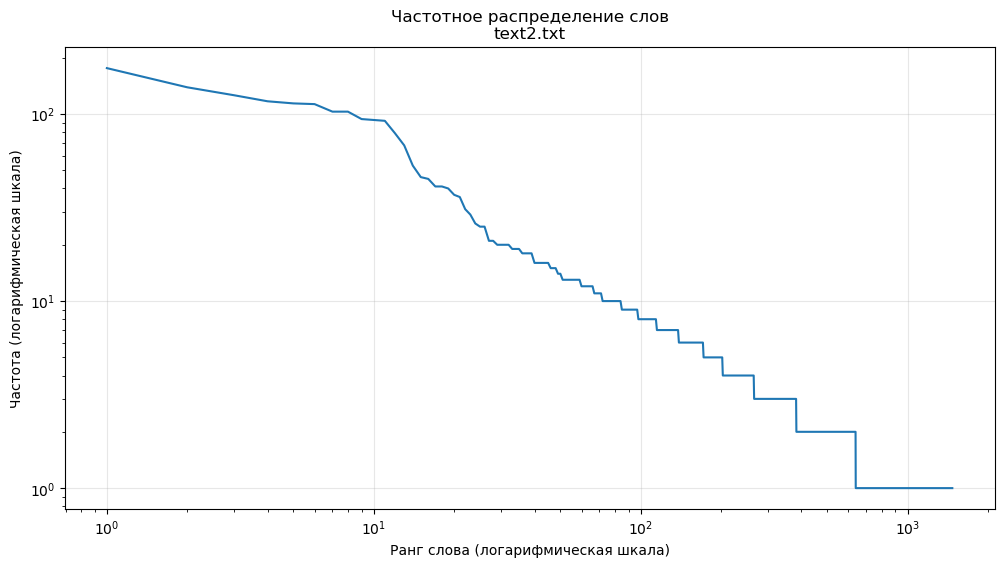


Частотное распределение для text2.txt:
Всего уникальных слов: 1470
Самые частые слова:
1. и: 176
2. мы: 139
3. я: 126
4. вы: 117
5. не: 114
6. в: 113
7. эллер: 103
8. на: 103
9. блейк: 94
10. он: 93


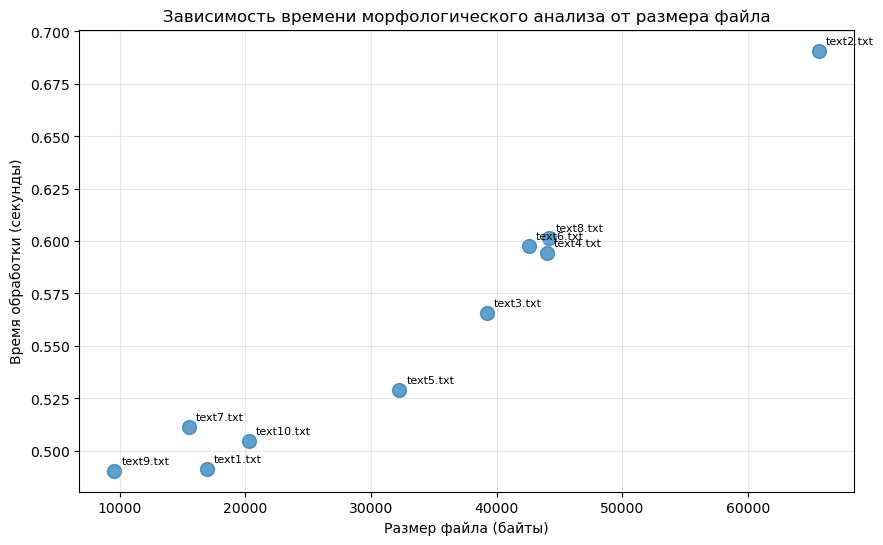


РАСПРЕДЕЛЕНИЕ ЧАСТЕЙ РЕЧИ (text2.txt):
Часть речи  Уникальные слова  Всего слов
         S               451        1349
         V               538        1266
      SPRO                19         797
        PR                32         476
      CONJ                15         345
       ADV               143         324
         A               183         292
      PART                25         232
      APRO                27         219
    ADVPRO                20          72
       NUM                 8          18
      ANUM                 5          18
      INTJ                 4          11


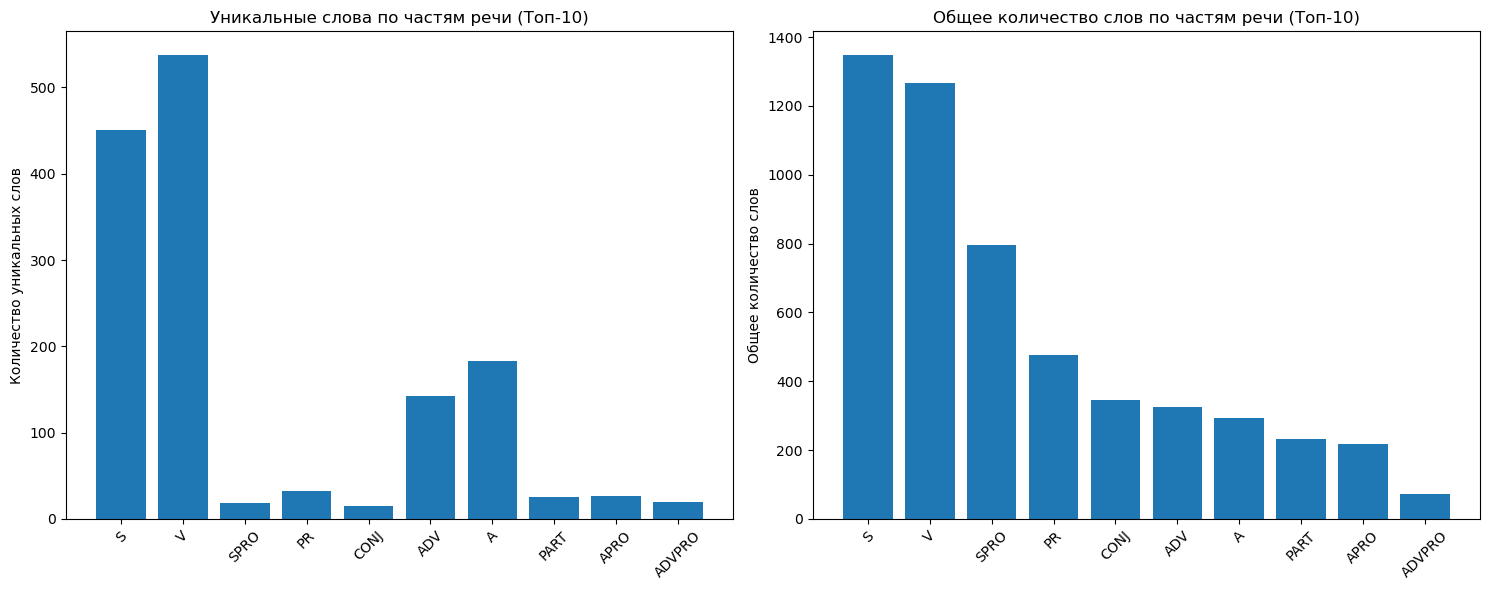

In [22]:
experiments()